<a href="https://colab.research.google.com/github/joren015/MercariProject/blob/main/CSCI5523_Mercari_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Download dataset from Kaggle using Kaggle API
Create a Kaggle API key with your Kaggle account and upload the json to the Google Colab root directory.

In [2]:
%%shell
mkdir /root/.kaggle
mv ./kaggle.json /root/.kaggle/kaggle.json
chmod 600 /root/.kaggle/kaggle.json
kaggle competitions download -c mercari-price-suggestion-challenge
7za e train.tsv.7z
7za e test.tsv.7z

mkdir: cannot create directory ‘/root/.kaggle’: File exists
mv: cannot stat './kaggle.json': No such file or directory
 99% 290M/294M [00:01<00:00, 168MB/s]
100% 294M/294M [00:01<00:00, 173MB/s]
 74% 55.0M/74.3M [00:00<00:00, 108MB/s] 
100% 74.3M/74.3M [00:00<00:00, 148MB/s]
  0% 0.00/7.77M [00:00<?, ?B/s]
100% 7.77M/7.77M [00:00<00:00, 123MB/s]
  0% 0.00/170k [00:00<?, ?B/s]
100% 170k/170k [00:00<00:00, 161MB/s]
 88% 30.0M/34.0M [00:00<00:00, 135MB/s]
100% 34.0M/34.0M [00:00<00:00, 150MB/s]

7-Zip (a) [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 77912192 bytes (75 MiB)

Extracting archive: train.tsv.7z
--
Path = train.tsv.7z
Type = 7z
Physical Size = 77912192
Headers Size = 122
Method = LZMA2:24
Solid = -
Blocks = 1

  0%      3% - train.tsv 

### Import packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Load train and test datasets

In [ ]:
df_train = pd.read_csv("train.tsv", sep='\t')
df_test = pd.read_csv("test.tsv", sep='\t')

### Functions

In [ ]:
def describe_df(df):
  for col in df.columns:
    print(col)
    print(df[col].describe())
    print("null/nan count: {}".format(len(df) - len(df[col].dropna())))
    print("\n")

In [ ]:
def extract_sub_category(df):
  df["temp"] = df["category_name"].apply(lambda x: str(x).lower().split('/'))
  max_categories = df["temp"].apply(lambda x: len(x)).max()
  new_cols = []
  for i in range(max_categories):
    new_col = "category_{}".format(i+1)
    df[new_col] = df["temp"].apply(lambda x: x[i] if len(x) >= (i+1) else None)
    new_cols.append(new_col)

  df = df.drop("temp", axis=1)
  return df, new_cols

### Describe datasets

##### Train

In [ ]:
describe_df(df_train)

train_id
count    1.482535e+06
mean     7.412670e+05
std      4.279711e+05
min      0.000000e+00
25%      3.706335e+05
50%      7.412670e+05
75%      1.111900e+06
max      1.482534e+06
Name: train_id, dtype: float64
null/nan count: 0


name
count     1482535
unique    1225273
top        Bundle
freq         2232
Name: name, dtype: object
null/nan count: 0


item_condition_id
count    1.482535e+06
mean     1.907380e+00
std      9.031586e-01
min      1.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      5.000000e+00
Name: item_condition_id, dtype: float64
null/nan count: 0


category_name
count                                            1476208
unique                                              1287
top       Women/Athletic Apparel/Pants, Tights, Leggings
freq                                               60177
Name: category_name, dtype: object
null/nan count: 6327


brand_name
count     849853
unique      4809
top         PINK
freq       54088
Name: br

##### Test

In [ ]:
describe_df(df_test)

test_id
count    693359.000000
mean     346679.000000
std      200155.646984
min           0.000000
25%      173339.500000
50%      346679.000000
75%      520018.500000
max      693358.000000
Name: test_id, dtype: float64
null/nan count: 0


name
count     693359
unique    601117
top       Bundle
freq        1111
Name: name, dtype: object
null/nan count: 0


item_condition_id
count    693359.000000
mean          1.906102
std           0.903378
min           1.000000
25%           1.000000
50%           2.000000
75%           3.000000
max           5.000000
Name: item_condition_id, dtype: float64
null/nan count: 0


category_name
count                                             690301
unique                                              1223
top       Women/Athletic Apparel/Pants, Tights, Leggings
freq                                               27900
Name: category_name, dtype: object
null/nan count: 3058


brand_name
count     397834
unique      3900
top         Nike
freq       2523

##### Unique sub categories

In [ ]:
df = pd.concat([df_train, df_test])
unique_categories = set(df["category_name"].apply(lambda x: str(x)).unique())
sub_categories = set()
for category in unique_categories:
  sub_categories = sub_categories.union(set([x.lower() for x in category.split('/')]))

sub_categories = list(sub_categories)
sub_categories.sort()
print("Category count: {}".format(len(unique_categories)))
print("Sub category count: {}\n".format(len(sub_categories)))
for c in sub_categories[0:10]:
  print(c)

Category count: 1311
Sub category count: 961

100 years or older
50 to 75 years
75 to 100 years
a-line
above knee, mini
accessories
accessory
aceo
action figure
action figures & statues


In [ ]:
for item_description in df["item_description"][0:10]:
  print(item_description)

No description yet
This keyboard is in great condition and works like it came out of the box. All of the ports are tested and work perfectly. The lights are customizable via the Razer Synapse app on your PC.
Adorable top with a hint of lace and a key hole in the back! The pale pink is a 1X, and I also have a 3X available in white!
New with tags. Leather horses. Retail for [rm] each. Stand about a foot high. They are being sold as a pair. Any questions please ask. Free shipping. Just got out of storage
Complete with certificate of authenticity
Banana republic bottoms, Candies skirt with matching blazer,Amy Byers suit, Loft bottoms and cami top.
Size small but straps slightly shortened to fit xs, besides that, perfect condition
You get three pairs of Sophie cheer shorts size small and medium girls and two sports bra/boy shorts spandex matching sets in small and medium girls. All items total retail for [rm] in store and you can take him today for less than the price of one item at the sto

##### Graphs

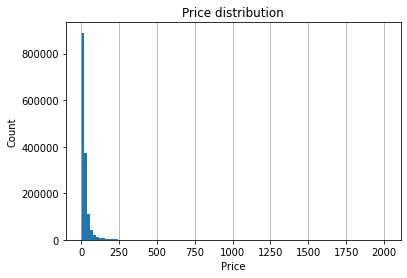

In [ ]:
df["price"].plot.hist(grid=True, bins=100)
plt.title('Price distribution')
plt.xlabel('Price')
plt.ylabel('Count')
plt.grid(axis='y')

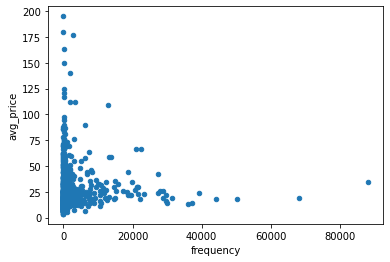

In [ ]:
df_category_freq_by_avg_price = df[["category_name", "price"]].groupby("category_name").agg(avg_price=pd.NamedAgg(column="price", aggfunc="mean"), frequency=pd.NamedAgg(column="category_name", aggfunc="count"))
df_category_freq_by_avg_price.plot.scatter(x="frequency", y="avg_price");

In [ ]:
df, new_cols = extract_sub_category(df)

In [ ]:
total_count = len(df)
for sub_category in sub_categories:
  df[sub_category] = np.logical_or.reduce([sub_category == df[col] for col in new_cols])
  print("P({}) = {}".format(sub_category, len(df[df[sub_category] == True]) / total_count))

P(100 years or older) = 8.73204301312472e-05
P(50 to 75 years) = 5.698807019091923e-05
P(75 to 100 years) = 2.9872778729110887e-05
P(a-line) = 0.000507837238394885
P(above knee, mini) = 0.013595331390223972
P(accessories) = 0.012386632804723024
P(accessory) = 1.9761992082334892e-05
P(aceo) = 4.5958121121709056e-07
P(action figure) = 0.0035746226608465302
P(action figures & statues) = 0.008419987370708315
P(action, adventure) = 8.27246180190763e-06
P(activity centers & entertainers) = 1.3327855125295626e-05
P(advertisement) = 1.8383248448683623e-06
P(afghan) = 5.974555745822177e-06
P(air conditioners) = 2.6655710250591252e-05
P(air fresheners) = 0.00029505113760137214
P(air purifiers) = 2.1140735715986164e-05
P(album) = 9.191624224341811e-07
P(all other sports) = 3.768565931980142e-05
P(amigurumi) = 1.3787436336512716e-06
P(amplifiers & effects) = 3.4928172052498884e-05
P(animal) = 0.00017372169784006023
P(animals) = 9.191624224341811e-07
P(animation) = 0.0020235360729888496
P(antique) 

In [ ]:
print(df[sub_categories])

        100 years or older  50 to 75 years  ...  yoga & pilates  zipper
0                    False           False  ...           False   False
1                    False           False  ...           False   False
2                    False           False  ...           False   False
3                    False           False  ...           False   False
4                    False           False  ...           False   False
...                    ...             ...  ...             ...     ...
693354               False           False  ...           False   False
693355               False           False  ...           False   False
693356               False           False  ...           False   False
693357               False           False  ...           False   False
693358               False           False  ...           False   False

[2175894 rows x 961 columns]


In [ ]:
df[["category_1", "category_2", "category_3", "category_4", "category_5"]]

,category_1,category_2,category_3,category_4,category_5
0,men,tops,t-shirts,None,None
1,electronics,computers & tablets,components & parts,None,None
2,women,tops & blouses,blouse,None,None
3,home,home décor,home décor accents,None,None
4,women,jewelry,necklaces,None,None
...,...,...,...,...,...
693354,home,home décor,home décor accents,None,None
693355,beauty,makeup,makeup sets,None,None
693356,electronics,cell phones & accessories,"cases, covers & skins",None,None
693357,women,swimwear,cover-ups,None,None


In [ ]:
df.columns

Index(['train_id', 'name', 'item_condition_id', 'category_name', 'brand_name',
       'price', 'shipping', 'item_description', 'test_id', 'category_1',
       ...
       'women's handbags', 'woodworking', 'wool', 'work & safety', 'wrap',
       'wristlet', 'writing', 'yarn', 'yoga & pilates', 'zipper'],
      dtype='object', length=975)